In [33]:
#Visualization

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#load dataset
data=pd.read_csv("cancer_expression.csv")

data.head(5)

,Gene,Control1,Control2,Control3,Control4,Control5,Control6,Control7,Control8,Control9,...,Treatment6,Treatment7,Treatment8,Treatment9,Treatment10,Treatment11,Treatment12,Treatment13,Treatment14,Treatment15
0,Gene1,56,97,19,76,65,25,87,91,79,...,63,46,96,64,84,19,66,66,51,66
1,Gene2,8,93,64,18,13,94,57,6,88,...,48,38,78,66,18,99,52,19,76,82
2,Gene3,64,45,33,19,49,69,93,75,13,...,27,66,92,41,48,90,95,39,69,51
3,Gene4,94,46,81,55,67,56,8,98,27,...,66,79,96,93,66,5,31,66,81,7
4,Gene5,63,36,92,56,66,62,56,16,43,...,79,60,21,42,28,73,74,90,15,20


In [34]:
control_cols=[i for i in data.columns if "Control" in i]
treatment_cols=[i for i in data.columns if "Treatment" in i]

#gene_row=[row for row in data.columns if "Gene" in row]

print("Column of controls:")
print(control_cols)
print("Column of Treatment:")
print(treatment_cols)

Column of controls:
['Control1', 'Control2', 'Control3', 'Control4', 'Control5', 'Control6', 'Control7', 'Control8', 'Control9', 'Control10', 'Control11', 'Control12', 'Control13', 'Control14', 'Control15']
Column of Treatment:
['Treatment1', 'Treatment2', 'Treatment3', 'Treatment4', 'Treatment5', 'Treatment6', 'Treatment7', 'Treatment8', 'Treatment9', 'Treatment10', 'Treatment11', 'Treatment12', 'Treatment13', 'Treatment14', 'Treatment15']


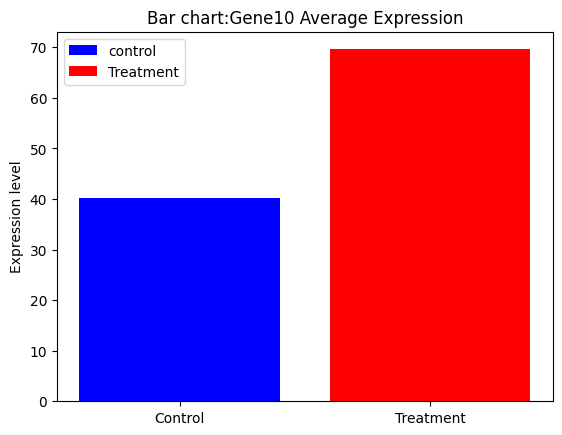

In [25]:
# Select the gene row
gene="Gene10"
gene_data=data[data["Gene"]==gene]

# Compute average
control_mean=gene_data[control_cols].mean(axis=1).values[0]
treatment_mean=gene_data[treatment_cols].mean(axis=1).values[0]

# plt.bar(x,y,color)
plt.bar("Control",control_mean,color="blue",label="control")
plt.bar("Treatment",treatment_mean,color="red",label="Treatment")
plt.title(f"Bar chart:{gene} Average Expression")
plt.ylabel("Expression level")
plt.legend()
plt.show()

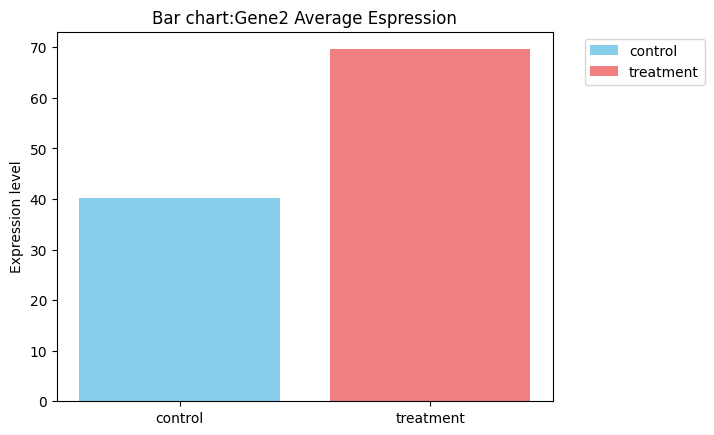

In [35]:
bars=plt.bar(["control","treatment"],
             [control_mean,treatment_mean],
             color=["skyblue","lightcoral"])

plt.title(f"Bar chart:{gene} Average Espression")
plt.ylabel("Expression level")
plt.legend(bars,["control","treatment"],
           bbox_to_anchor=(1.05,1),
           loc='upper left')
plt.show()

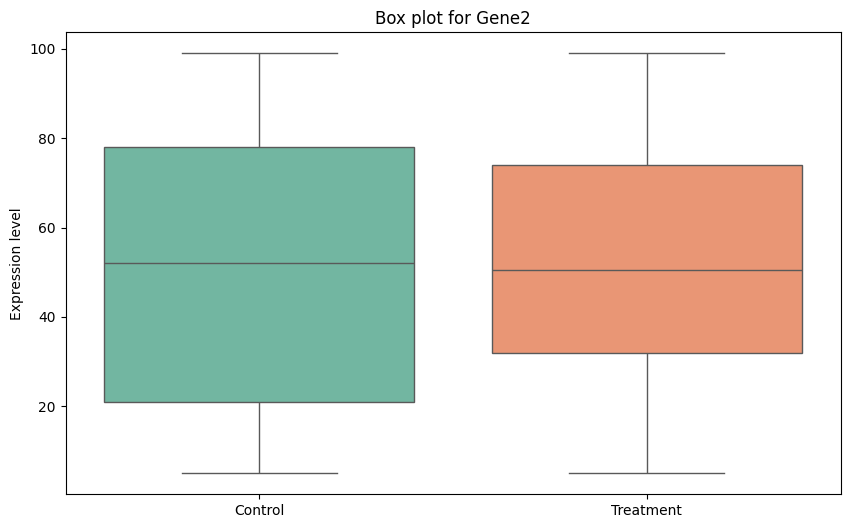

In [36]:
control_data=data[['Control1','Control2']].values.flatten()
treatment_data=data[['Treatment1','Treatment2']].values.flatten()

plt.figure(figsize=(10,6))
sns.boxplot(data=[control_data,treatment_data],palette='Set2')

plt.xticks([0,1],["Control","Treatment"])
plt.title(f'Box plot for {gene}')
plt.ylabel("Expression level")
plt.show()

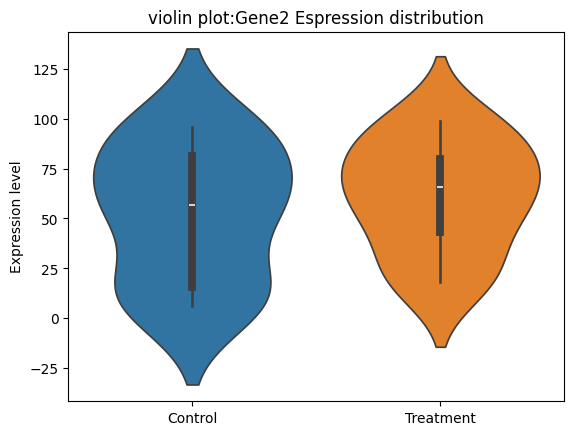

In [ ]:
gene="Gene2"
gene_row=data[data["Gene"]==gene].iloc[0]

violin_data=[gene_row[control_cols].values,gene_row[treatment_cols].values]

sns.violinplot(data=violin_data)
plt.xticks([0,1],["Control","Treatment"])
plt.ylabel("Expression level")
plt.title(f"violin plot:{gene} Espression distribution")
plt.show()

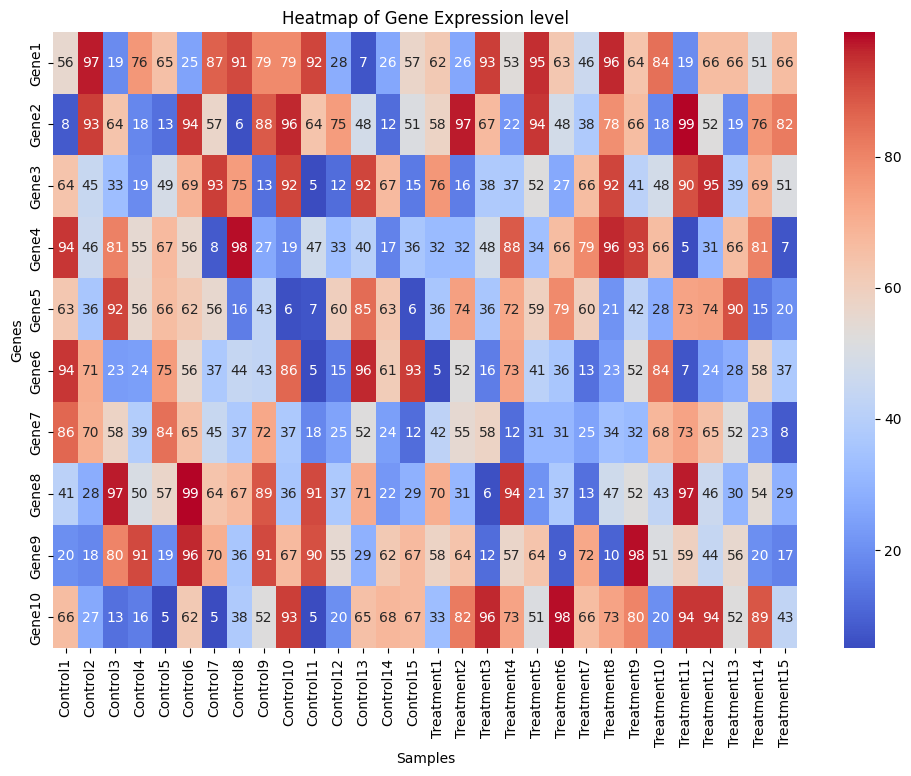

In [41]:
# Heatmap
df=pd.read_csv("cancer_expression.csv")

heatmap_data=df.set_index('Gene')
heatmap=heatmap_data.head(10)

plt.figure(figsize=(12,8))
sns.heatmap(heatmap,cmap="coolwarm",annot=True,fmt='.0f')
plt.title("Heatmap of Gene Expression level")
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.show()

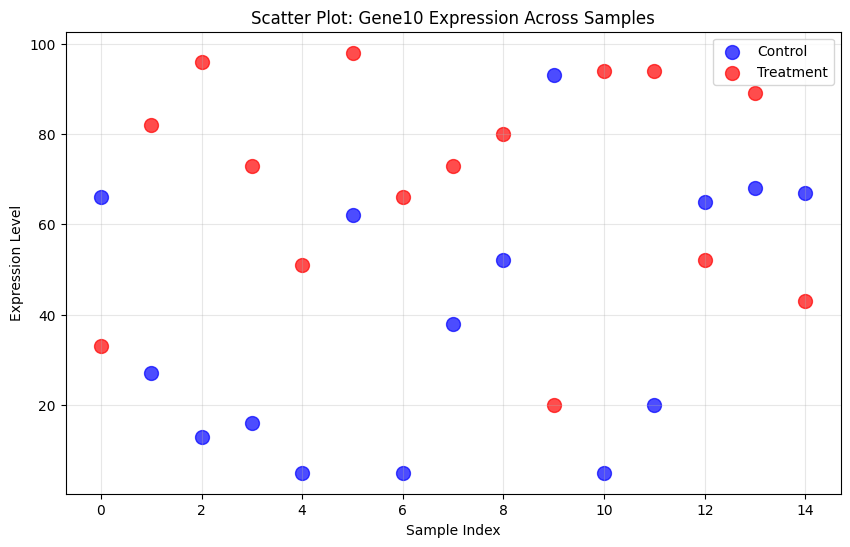

In [44]:
# Scatter plot
data=pd.read_csv("cancer_expression.csv")
gene="Gene10"

control_values=data.loc[data['Gene']==gene,control_cols].values.flatten()
treatment_values=data.loc[data['Gene']==gene,treatment_cols].values.flatten()

plt.figure(figsize=(10,6))
plt.scatter(range(len(control_values)),control_values,color='blue',label='Control',s=100,alpha=0.7)
plt.scatter(range(len(treatment_values)),treatment_values,color='red',label='Treatment',s=100,alpha=0.7)

plt.xlabel('Sample Index')
plt.ylabel('Expression Level')
plt.title(f'Scatter Plot: {gene} Expression Across Samples')
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()